In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

path_data = '/Users/dariozappala/Library/CloudStorage/Dropbox/università/RTD-A/progetti/dati/Crunchbase/'
path_images = './immagini/'

Interessanti:
- Category groups
- Jobs

# Jobs

- `title` indica il ruolo dettagliato
- `job_type` indica la categoria generale del ruolo. Può avere 5 valori:
    - `executive` (1.869.260): Circa 723.000 ruoli con la parola 'founder'. Per il resto, ruoli dirigenziali.
    - `employee` (626.450): Ruoli vari. Circa 18.000 ruoli con la parola 'founder'.
    - `board_member` (218.030): Vari ruoli con 'member' e 'board'. Circa 8000 ruoli con 'founder'.
    - `advisor` (84.071): Quasi tutti ruoli con la parola 'advisor'. Circa 2000 'Mentor' e 1000 'founder'
    - `board_observer` (8855)

In [4]:
%%time
df_jobs = pd.read_csv(path_data + 'jobs.csv')
df_jobs.shape

CPU times: user 11.8 s, sys: 1.24 s, total: 13 s
Wall time: 13.2 s


(2806666, 17)

In [5]:
df_jobs.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,org_uuid,org_name,started_on,ended_on,is_current,title,job_type
0,697b6934-fc1f-9d63-cfb2-1a10759b378e,Ben Elowitz Co-Founder and CEO @ Wetpaint,job,ben-elowitz-executive-wetpaint--697b6934,https://www.crunchbase.com/job/ben-elowitz-exe...,NaN,2007-05-25 07:03:54,2021-03-25 03:59:21,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,2005-10-01,2014-06-01,False,Co-Founder and CEO,executive
1,b1de3765-442e-b556-9304-551c2a055901,Kevin Flaherty VP Marketing @ Wetpaint,job,kevin-flaherty-executive-wetpaint--b1de3765,https://www.crunchbase.com/job/kevin-flaherty-...,NaN,2007-05-25 07:04:16,2018-02-13 01:32:51,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,NaN,False,VP Marketing,executive
2,1319cd30-f5e8-c700-0af6-64029c6f7124,Raju Vegesna Chief Evangelist @ Zoho,job,raju-vegesna-employee-zoho--1319cd30,https://www.crunchbase.com/job/raju-vegesna-em...,NaN,2007-05-25 19:33:03,2018-02-13 01:19:53,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2000-11-01,NaN,True,Chief Evangelist,employee
3,27a252de-1ea8-c620-b2d4-5b889fa9b40f,Ian Wenig VP Business Development @ Zoho,job,ian-wenig-executive-zoho--27a252de,https://www.crunchbase.com/job/ian-wenig-execu...,NaN,2007-05-25 19:34:53,2018-02-13 01:21:35,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2006-03-01,NaN,True,VP Business Development,executive
4,5a802a79-229f-44ae-0aba-db330f10b67a,Jay Adelson CEO @ Digg,job,jay-adelson-executive-digg--5a802a79,https://www.crunchbase.com/job/jay-adelson-exe...,NaN,2007-05-25 20:05:33,2018-02-13 01:25:38,c92a1f00-8c19-bf2e-0f28-dbbd383dc968,Jay Adelson,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,2005-07-01,2010-04-05,False,CEO,executive


In [6]:
(df_jobs.value_counts(['job_type'], sort = True, normalize = False, dropna = False))[:20]

job_type      
executive         1869260
employee           626450
board_member       218030
advisor             84071
board_observer       8855
Name: count, dtype: int64

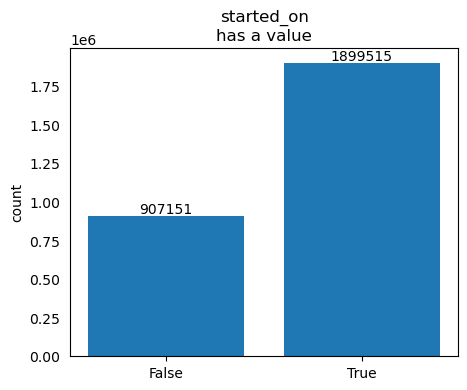

In [7]:
col = 'started_on'
#col = 'ended_on'

fig, ax = plt.subplots(figsize = (5, 4))
values, counts = np.unique(~df_jobs[col].isna(), return_counts = True)
Delta_y = counts.max() * 1/100
ax.bar(x = range(len(values)), height = counts)
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
ax.set_xticks(range(len(values)), values)
for i in range(len(values)):
    plt.text(i, counts[i] + Delta_y, counts[i], ha = 'center')
ax.set_ylabel('count')
ax.set_title(col + '\nhas a value')
plt.savefig(path_images + 'has_value.png', bbox_inches = 'tight')
plt.show()

In [8]:
ser_dates = pd.to_datetime(df_jobs['started_on'], errors = 'coerce')
ser_dates = ser_dates[~ser_dates.isna()]
ser_dates = ser_dates.dt.year

df_stats_dates = pd.DataFrame(ser_dates.groupby(ser_dates).count().rename('count'))
df_stats_dates.index.names = ['date']
df_stats_dates['cumulative count'] = df_stats_dates['count'].cumsum()
df_stats_dates

,count,cumulative count
date,,
1682,1,1
1690,4,5
1692,1,6
1694,1,7
1695,1,8
...,...,...
2019,132721,1552116
2020,135195,1687311
2021,123956,1811267


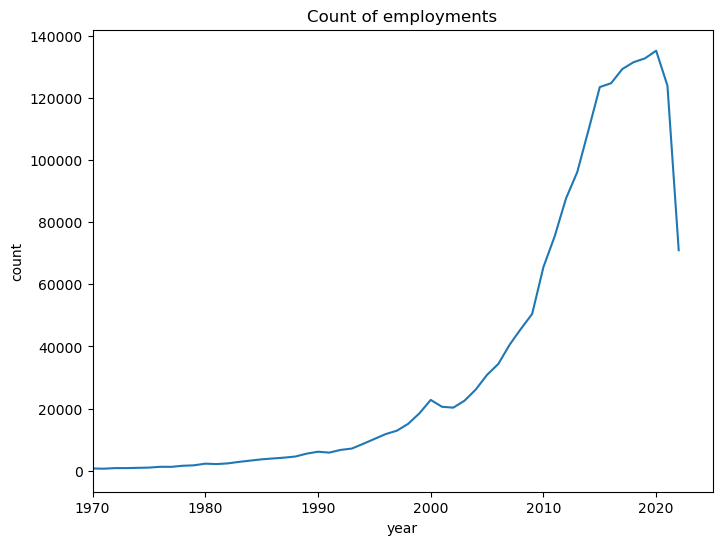

In [9]:
data_plot = df_stats_dates.iloc[:-1]

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(data_plot.index, data_plot['count'])
ax.set_xlim(1970, 2025)
ax.set_xlabel('year')
ax.set_ylabel('count')
ax.set_title('Count of employments')
plt.savefig(path_images + 'count_employments.png', bbox_inches = 'tight')
plt.show()

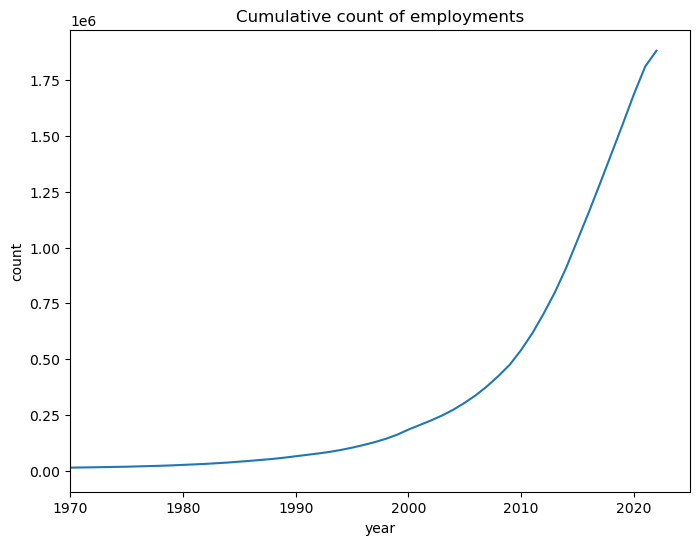

In [10]:
data_plot = df_stats_dates.iloc[:-1]

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(data_plot.index, data_plot['cumulative count'])
#ax.scatter(data_plot.index, data_plot['cumulative count'])
ax.set_xlim(1970, 2025)
ax.set_xlabel('year')
ax.set_ylabel('count')
ax.set_title('Cumulative count of employments')
plt.savefig(path_images + 'cumulative_count_employments.png', bbox_inches = 'tight')
plt.show()

## Clean values

In [11]:
df_jobs_clean = df_jobs[['job_type', 'title']].copy()

### Founder

In [12]:
df_jobs_clean.loc[
    df_jobs_clean['title'].str.contains('founder', case = False, na = False),
    'title'
] = 'Founder'

## Explore values

In [13]:
stats = pd.DataFrame(df_jobs_clean.value_counts(['job_type', 'title'], sort = True, normalize = False, dropna = False)).reset_index()

In [14]:
i = 0
stats[stats['job_type'] == 'executive'].iloc[i:(i+20)]
#stats[stats['title'].str.contains('mentor', case = False, na = False)].iloc[i:(i+20)]
#stats[(stats['job_type'] == 'employee') & (stats['title'].str.contains('founder', case = False, na = False))].iloc[i:(i+20)]

,job_type,title,count
0,executive,Founder,722560
1,executive,CEO,117646
3,executive,Chief Executive Officer,35784
5,executive,President,31727
6,executive,CTO,30807
7,executive,Managing Director,28536
9,executive,Owner,24752
10,executive,Director,24712
11,executive,CFO,24118
13,executive,Chief Financial Officer,21094


In [15]:
stats.shape

(515662, 3)

# Organizations

In [16]:
df_organizations = pd.read_csv(path_data + 'organizations.csv')
df_organizations.shape

(3090736, 41)

In [18]:
#df_organizations

In [22]:
df_organizations.iloc[:5, 0:20]

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,domain,homepage_url,country_code,state_code,region,city,address,postal_code,status,short_description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,184663.0,2007-05-25 13:51:27,2023-08-01 00:01:37,NaN,company,wetpaint.com,http://www.wetpaint.com/,USA,NY,New York,New York,902 Broadway 11th Floor New,10010,acquired,Wetpaint offers an online social publishing pl...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,13591.0,2007-05-26 02:30:28,2023-06-19 08:30:22,Zoho Corporation Pvt. Ltd.,"investor,company",zoho.com,https://www.zoho.com,USA,CA,California,Pleasanton,NaN,NaN,operating,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,29463.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,digg.com,http://www.digg.com,USA,NY,New York,New York,NaN,NaN,acquired,Digg Inc. operates a website that enables its ...
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,60637.0,2007-05-26 03:21:34,2023-08-30 02:27:06,NaN,"investor,company",omidyar.com,http://www.omidyar.com,USA,CA,California,Redwood City,1991 Broadway Suite 200,94063,operating,Omidyar Network is an investment firm.
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,148.0,2007-05-26 04:22:15,2023-05-04 18:27:53,"Meta Platforms, Inc.","investor,company",meta.com,https://meta.com,USA,CA,California,Menlo Park,1 Hacker Way,94025,ipo,Meta is a social technology company that enabl...


In [20]:
df_organizations.iloc[:5, 20:40]

,category_list,category_groups_list,num_funding_rounds,total_funding_usd,total_funding,total_funding_currency_code,founded_on,last_funding_on,closed_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role
0,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",3.0,3.975000e+07,3.975000e+07,USD,2005-06-01,2008-05-19,NaN,51-100,info@wetpaint.com,206-859-6300,https://www.facebook.com/Wetpaint,https://www.linkedin.com/company/recruitment-c...,https://twitter.com/wetpainttv,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company
1,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",NaN,NaN,NaN,NaN,1996-03-17,NaN,NaN,10000+,sales@zohocorp.com,044 - 67447070,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company
2,"Internet,Social Media,Social Network","Internet Services,Media and Entertainment",6.0,4.900000e+07,4.900000e+07,USD,2004-10-11,2016-09-13,NaN,51-100,feedback@digg.com,877-342-7222,http://www.facebook.com/digg,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company
3,"Enterprise Software,Financial Services,Venture...","Financial Services,Lending and Investments,Sof...",NaN,NaN,NaN,NaN,2004-01-01,NaN,NaN,101-250,info@omidyar.com,650.482.2500,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,investor
4,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",16.0,2.462282e+10,2.462282e+10,USD,2004-02-04,2022-08-04,NaN,10000+,NaN,NaN,https://www.facebook.com/Meta,https://www.linkedin.com/company/meta,https://www.twitter.com/Meta,https://images.crunchbase.com/image/upload/t_c...,Facebook,"Facebook, Inc.",NaN,company


In [21]:
df_organizations.iloc[:5, 36:41]

,alias1,alias2,alias3,primary_role,num_exits
0,NaN,NaN,NaN,company,NaN
1,NaN,NaN,NaN,company,2.0
2,NaN,NaN,NaN,company,NaN
3,NaN,NaN,NaN,investor,59.0
4,Facebook,"Facebook, Inc.",NaN,company,1.0
